## Portuguese Banking Institution Campaign

### Project Description

The objective of this project is to build and train a machine learning model based on supervised learning classification algorithms capable of predicting if a bank client is going to subscribe to a term deposite campaign.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
data = pd.read_excel("Train.xlsx")

### Data Analysis

#### Checking the data

Before using a new data set to train our models, it should always be checked if it is in proper shape: check for missing values, duplicated values, etc.

In [53]:
data.describe()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed
count,31028.000000,31248.000000,31647.000000,31336.000000,31535.000000,5816.000000,31647.000000,31647.000000
mean,40.439216,1368.112615,15.818561,256.184038,2.776629,224.995186,0.591620,0.107246
std,10.751392,3085.342417,8.322970,256.181479,3.153293,114.991828,2.499675,0.309430
min,18.000000,-8020.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32.000000,72.000000,8.000000,103.000000,1.000000,133.000000,0.000000,0.000000
50%,39.000000,449.000000,16.000000,179.000000,2.000000,195.000000,0.000000,0.000000
75%,48.000000,1413.000000,21.000000,315.250000,3.000000,329.000000,0.000000,0.000000
max,97.000000,102128.000000,31.000000,4900.000000,63.000000,871.000000,275.000000,1.000000


In [54]:
data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


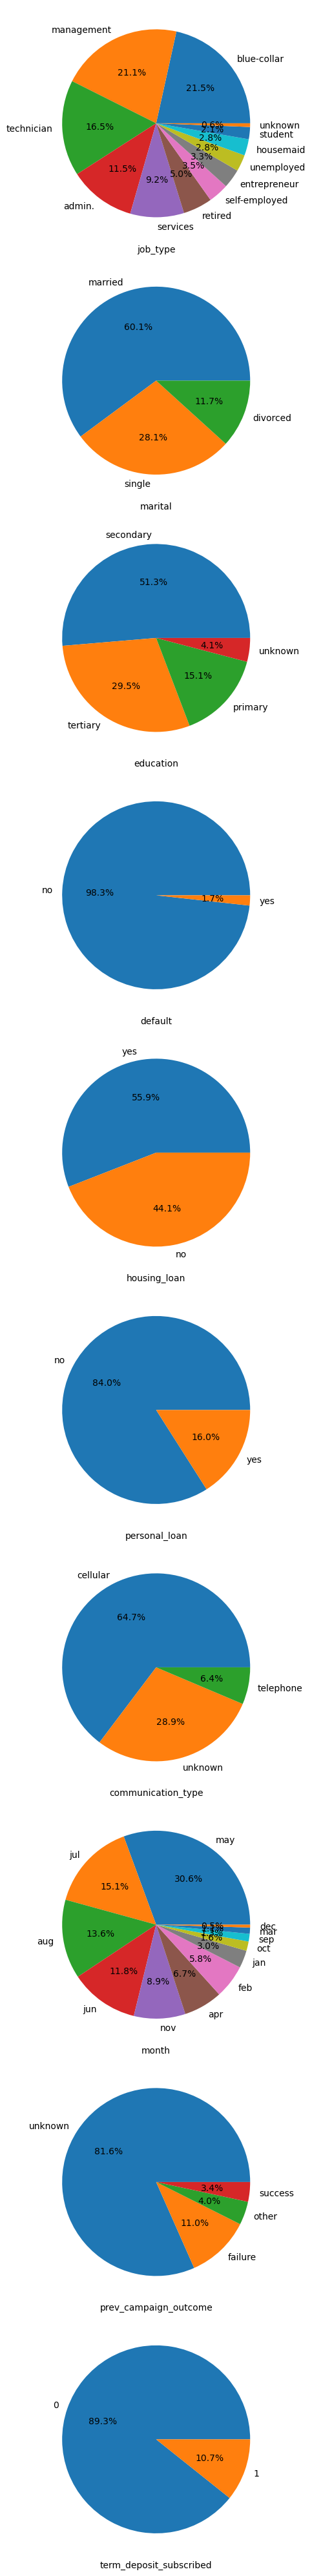

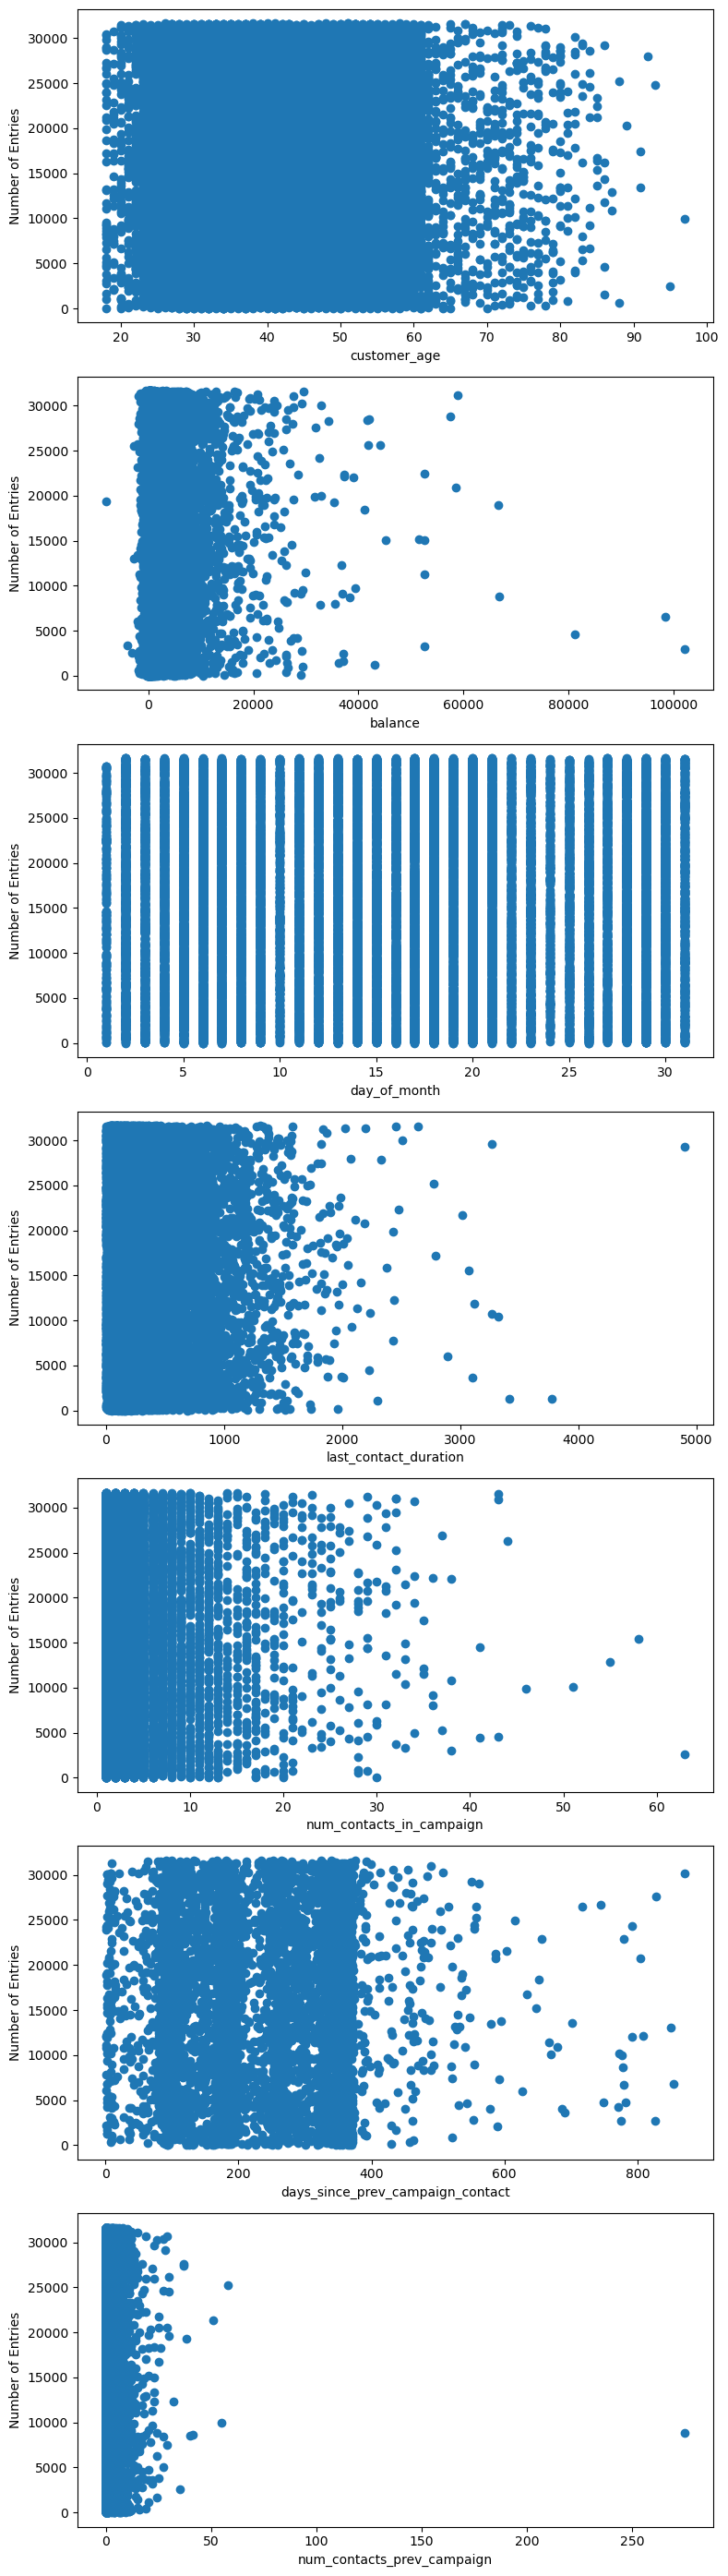

In [55]:
# Group the columns in each type
columns = ['job_type', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'communication_type', 'month', 'prev_campaign_outcome', 'term_deposit_subscribed']
int_columns = ['customer_age', 'balance', 'day_of_month', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact', 'num_contacts_prev_campaign']

# Pie Charts for columns
fig, axes = plt.subplots(len(columns), 1, figsize=(8, len(columns) * 4))

for i, column in enumerate(columns):
    ax = axes[i]
    counts = data[column].value_counts()
    ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
    ax.set_xlabel(column)


plt.tight_layout()

plt.show()

# Scatter Plots for the int_columns
fig, axes = plt.subplots(len(int_columns), 1, figsize=(8, len(int_columns) * 4))

for i, column in enumerate(int_columns):
    ax = axes[i]
    ax.scatter(data[column], range(len(data)))
    ax.set_xlabel(column)
    ax.set_ylabel('Number of Entries')

plt.tight_layout()

plt.show()



After a first look at the data set it's clear that the data is not in the best shape and it will need to be cleaned before applying the models.


#### Missing Values

One of the problems with our data set is the missing values.

In [56]:
data.isna().sum()

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64


As expected, the data set has several missing values.

To fix it, our approach was to replace all missing values by default values that we calculated:

- For the customer_age column, we decided to use the mean of the values
- For the marital status, we used "widowed"
- For the balance, we used the median instead of the mean, as it has a bigger range of values
- For the personal_loan column, we eliminated the rows with missing values
- For the last_contact_duration, we used the mean
- For the num_contacts_in_campaign, we used the median
- For the days_since_prev_campaign_contact, we used 0

In [57]:
# Setting up default values
customer_age_default = round(data["customer_age"].mean(),0)
marital_default = "widowed"
balance_default = data["balance"].median()
personal_default = "unknown"
last_contact_duration_default = round(data["last_contact_duration"].mean(), 0)
num_contacts_in_campaign_default = data["num_contacts_in_campaign"].median()
days_since_prev_campaign_contact_default = 0

# Filling the empty cells
data.fillna({'customer_age': customer_age_default}, inplace=True)
data.fillna({'marital': marital_default}, inplace=True)
data.fillna({'balance': balance_default}, inplace=True)
data.fillna({'personal_loan': personal_default}, inplace=True)
data.fillna({'last_contact_duration': last_contact_duration_default}, inplace=True)
data.fillna({'num_contacts_in_campaign': num_contacts_in_campaign_default}, inplace=True)
data.fillna({'days_since_prev_campaign_contact': days_since_prev_campaign_contact_default}, inplace=True)

# Remove rows with job_type as "unknown"
data = data[(data['job_type'] != 'unknown')]
data = data[(data['personal_loan'] != 'unknown')]
data = data[(data['prev_campaign_outcome'] != 'other')]

data.isna().sum()

id                                  0
customer_age                        0
job_type                            0
marital                             0
education                           0
default                             0
balance                             0
housing_loan                        0
personal_loan                       0
communication_type                  0
day_of_month                        0
month                               0
last_contact_duration               0
num_contacts_in_campaign            0
days_since_prev_campaign_contact    0
num_contacts_prev_campaign          0
prev_campaign_outcome               0
term_deposit_subscribed             0
dtype: int64


Now the data set is complete.


#### Duplicated values

Now that the data set is complete, we'll check for duplicated values.

In [58]:
length = len(data)
data.drop_duplicates(keep = False)
cleanedDups = len(data)

print("Original dataset length: ", length)
print("Number of dups: ", length - cleanedDups)

Original dataset length:  30037
Number of dups:  0



There are no duplicated values in our data set.


#### Balancing the Data

During our analysis, we noticed that the data set was very unbalanced. The number of 0's in the target variable and the number of 1's was very different.


In [59]:
class_counts = data['term_deposit_subscribed'].value_counts()
num_zeros = class_counts[0]
num_ones = class_counts[1]

print("Number of 0's: " + str(num_zeros))
print("Number of 1's: " + str(num_ones))

Number of 0's: 26868
Number of 1's: 3169



The disparity of these numbers could influence the results of the model, so we decided to balance the data set.


In [60]:
# Balancing DataSet
zero_indices = data[data['term_deposit_subscribed'] == 0].index
one_indices = data[data['term_deposit_subscribed'] == 1].index

count_diff = abs(num_zeros - num_ones)

if num_zeros > num_ones:
    remove_indices = np.random.choice(zero_indices, count_diff, replace=False)
else:
    remove_indices = np.random.choice(one_indices, count_diff, replace=False)

data = data.drop(remove_indices)

class_counts = data['term_deposit_subscribed'].value_counts()
num_zeros = class_counts[0]
num_ones = class_counts[1]

print("Number of 0's: " + str(num_zeros))
print("Number of 1's: " + str(num_ones))

Number of 0's: 3169
Number of 1's: 3169



Now the data set is balanced and it's ready to be used by the models.


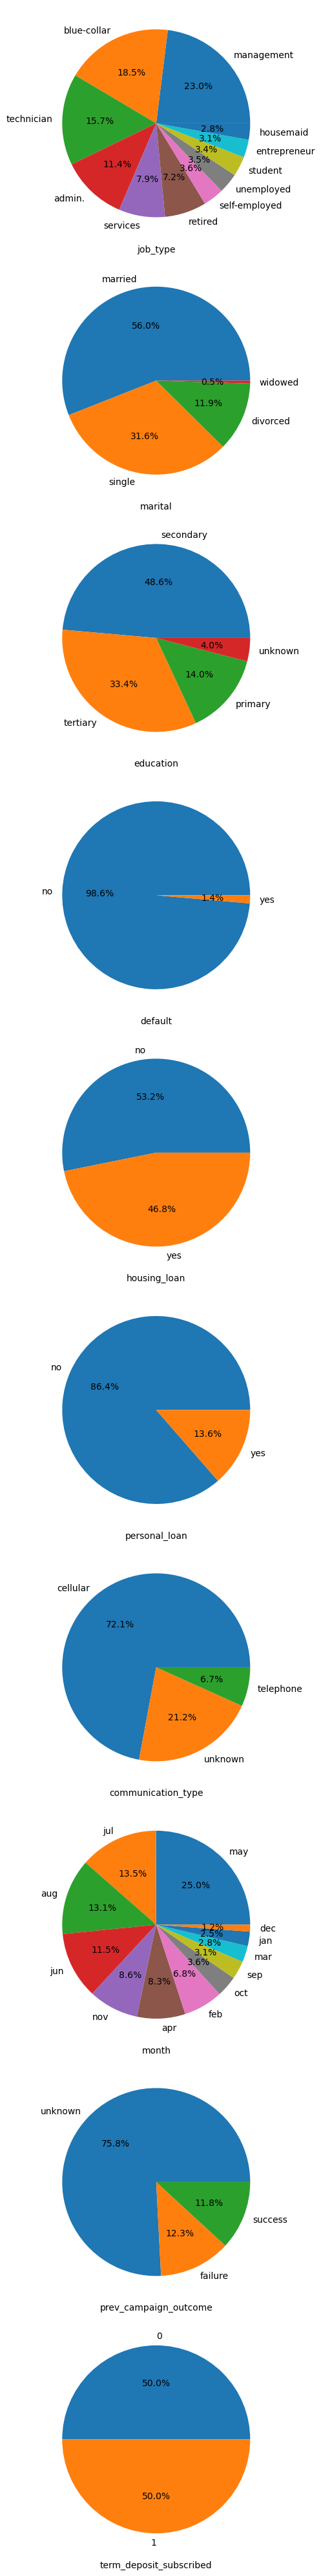

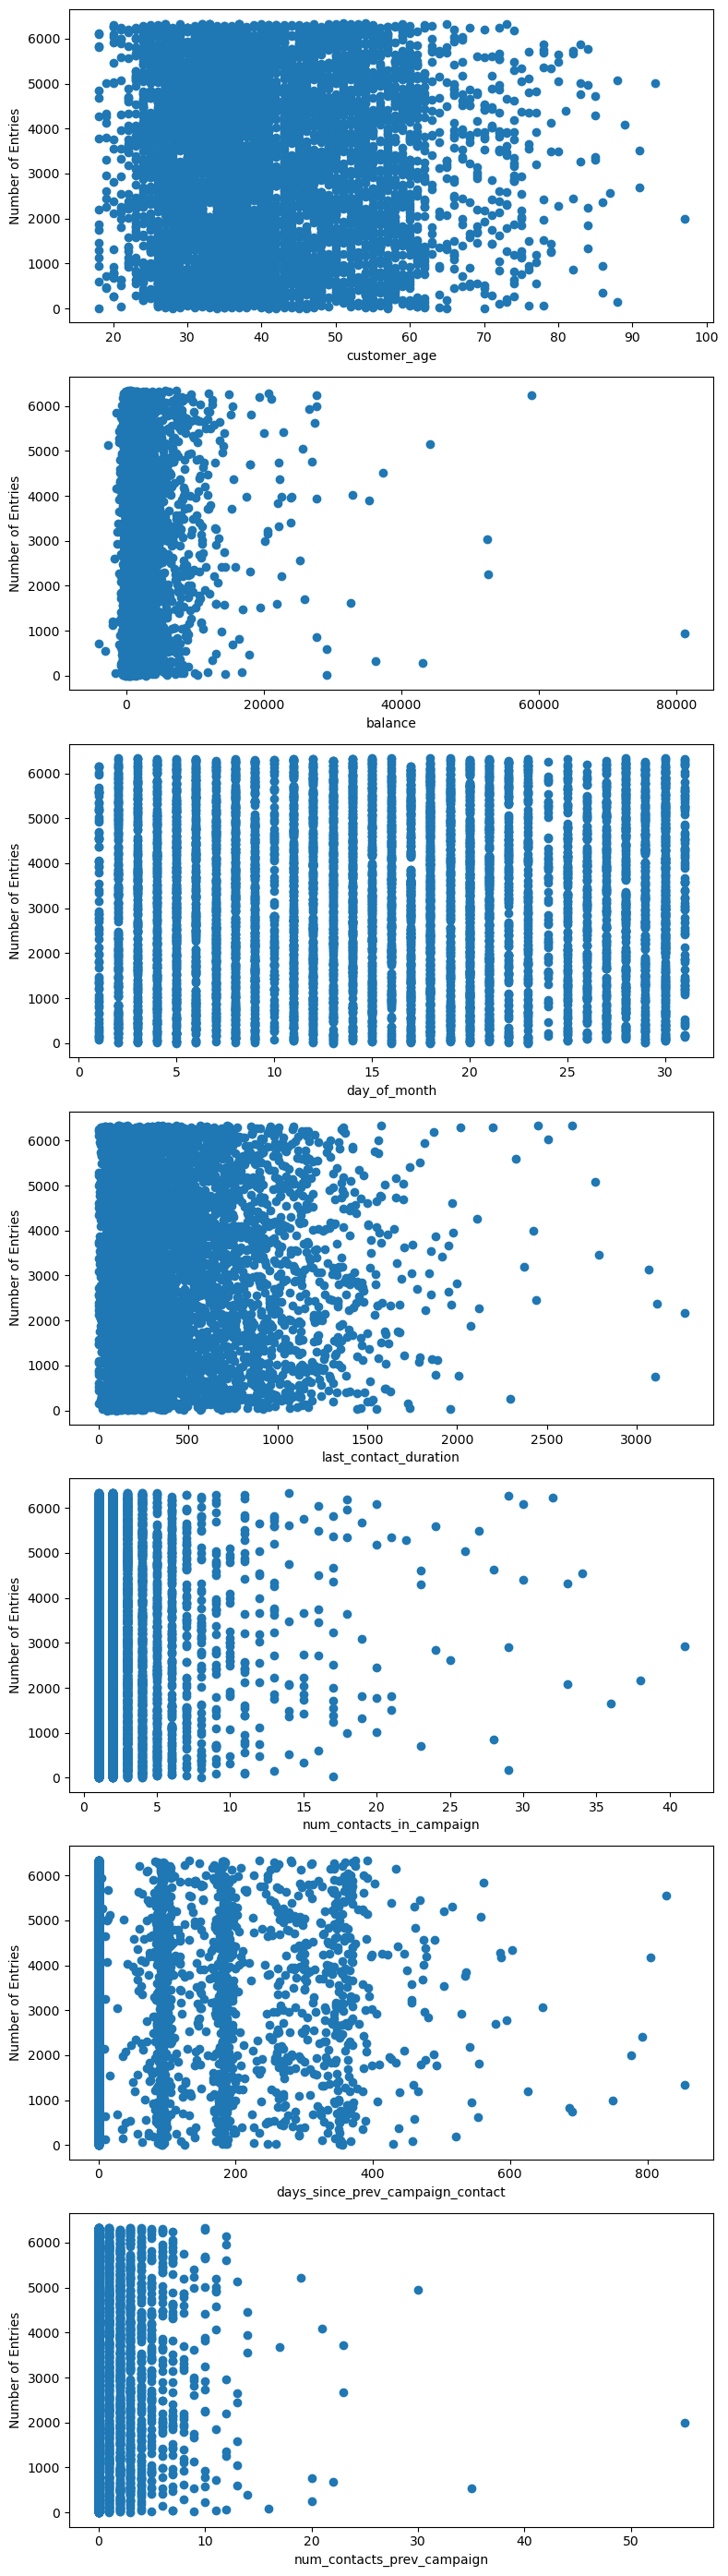

Number of entries: 6338


In [61]:
# Piecharts for the columns
fig, axes = plt.subplots(len(columns), 1, figsize=(8, len(columns) * 4))

for i, column in enumerate(columns):
    ax = axes[i]
    counts = data[column].value_counts()
    ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
    ax.set_xlabel(column)

plt.tight_layout()

plt.show()

# Scatter Plots for int_columns
fig, axes = plt.subplots(len(int_columns), 1, figsize=(8, len(int_columns) * 4))

for i, column in enumerate(int_columns):
    ax = axes[i]
    ax.scatter(data[column], range(len(data)))
    ax.set_xlabel(column)
    ax.set_ylabel('Number of Entries')

plt.tight_layout()

plt.show()

# Print the number of entries
num_entries = len(data)
print("Number of entries:", num_entries)


### Training the Model

To train the model we used 4 algorithms:

- SMV
- Decision Trees
- Neural Networks
- Random

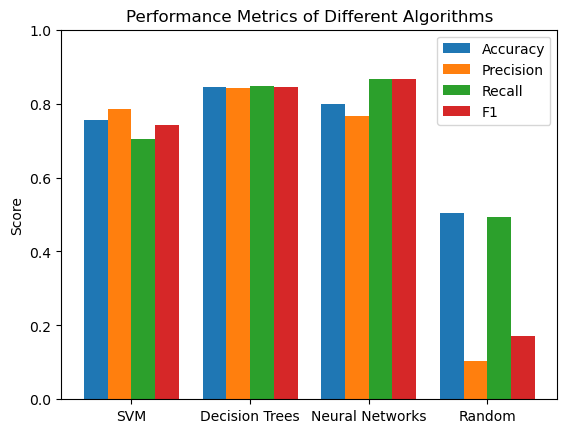

In [62]:
#Resulting of perfomance Graph
# Algorithms and his results
algorithms = ['SVM', 'Decision Trees', 'Neural Networks', 'Random']
accuracy = [0.755, 0.844, 0.8, 0.505]
precision = [0.785, 0.842, 0.767, 0.104]
recall = [0.703, 0.848, 0.866, 0.492]
f1 = [0.742, 0.845, 0.866, 0.172]

# Set thee Graph
fig, ax = plt.subplots()

x = range(len(algorithms))
width = 0.2

ax.bar(x, accuracy, width, label='Accuracy')
ax.bar([i + width for i in x], precision, width, label='Precision')
ax.bar([i + width*2 for i in x], recall, width, label='Recall')
ax.bar([i + width*3 for i in x], f1, width, label='F1')

# Set the x-axis ticks and labels
ax.set_xticks([i + width*1.5 for i in x])
ax.set_xticklabels(algorithms)

ax.set_ylim(0, 1)

ax.set_ylabel('Score')

# Add Coments
ax.legend()

# Set the title
ax.set_title('Performance Metrics of Different Algorithms')

# Display the graph
plt.show()